# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

C:\Users\tj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
pd

<module 'pandas' from 'C:\\Users\\tj\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [7]:
pd.set_option('display.max_columns', 360)


In [8]:
# your code here
df = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [9]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
#your code here

df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 88, 0, df['PHYSHLTH'])

In [12]:
df['PHYSHLTH'] = np.where((df['PHYSHLTH'] == 77) ,np.NaN, df['PHYSHLTH'])
df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 99, np.NaN, df['PHYSHLTH'])

In [49]:
df['PHYSHLTH'].value_counts()

0.0     19823
30.0     2290
2.0      1873
1.0      1438
3.0      1133
5.0      1028
10.0      701
7.0       607
15.0      599
4.0       581
20.0      378
14.0      313
6.0       176
25.0      151
8.0        94
12.0       64
21.0       63
28.0       54
29.0       29
18.0       19
27.0       19
16.0       16
9.0        15
17.0       14
22.0       11
13.0        9
11.0        8
19.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [47]:
df.dropna(subset=['PHYSHLTH'],inplace = True)

In [48]:
df['PHYSHLTH'].mean()

4.106463275402765

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [14]:
# descriptive statistics


<AxesSubplot:>

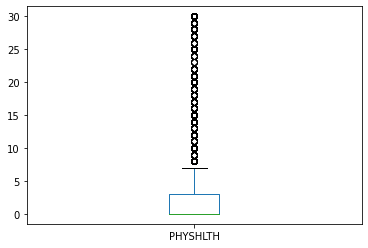

In [15]:
df['PHYSHLTH'].plot(kind = 'box')

Text(0.5, 1.0, 'Distribution of People sick days')

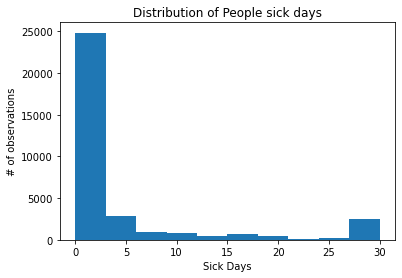

In [16]:
# graph the distribution of data
ax = df['PHYSHLTH'].plot(kind = 'hist')
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title('Distribution of People sick days')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [17]:
# code to calculate the average number of sick days by state



In [18]:
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

Text(0.5, 1.0, 'Comparing Health by State')

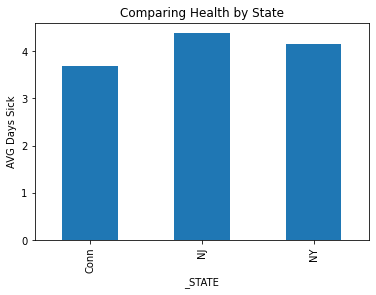

In [19]:
ax = df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind = 'bar')
ax.set_ylabel('AVG Days Sick')
ax.set_xticklabels(['Conn','NJ','NY'])
ax.set_title('Comparing Health by State')

In [20]:
# code to graph those averages using matplotlib


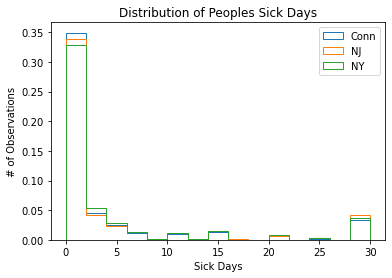

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df[df['_STATE'] == 9]['PHYSHLTH'], histtype='step', label ='Conn', density = True, bins = 15)
ax.hist(df[df['_STATE'] == 34]['PHYSHLTH'], histtype='step', label = 'NJ', density = True, bins = 15)
ax.hist(df[df['_STATE'] == 36]['PHYSHLTH'], histtype='step', label = 'NY', density = True, bins = 15)
ax.set_ylabel('# of Observations')
ax.set_xlabel('Sick Days')
ax.set_title('Distribution of Peoples Sick Days')
plt.legend()
plt.show()

In [22]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [23]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>12, 1, 0)

In [46]:
df['chron'].value_counts()

0    28221
1     3991
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [24]:
df.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.110880
34.0    0.134011
36.0    0.122949
Name: chron, dtype: float64

Text(0.5, 1.0, 'Comparing Health by State')

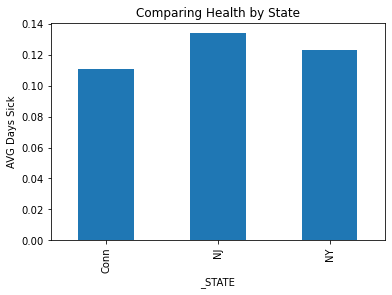

In [25]:
# code to calculate averages per state
ax = df.groupby('_STATE')['chron'].mean().plot(kind = 'bar')
ax.set_ylabel('AVG Days Sick')
ax.set_xticklabels(['Conn','NJ','NY'])
ax.set_title('Comparing Health by State')

In [26]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [27]:
conditions = [df['SMOKDAY2'] == 1,
              df['SMOKDAY2'] == 2,
              df['SMOKDAY2'] == 3,
              df['SMOKDAY2'] == 7,
              df['SMOKDAY2'] == 9,
              df['SMOKE100'] == 2,
              df['SMOKE100'] == 7,
              df['SMOKE100']  == 9
             ]
choices = ['Everday',
           'Some Days',
           'None',
           'Unknown',
           'Unknown',
          'None',
          'Unknown',
          'Unknown']
           
    
df['Smoker'] = np.select(conditions, choices, default='Unknown')

In [28]:
df['Smoker'].describe()

count     34545
unique        4
top        None
freq      28790
Name: Smoker, dtype: object

In [29]:
# your code here

Text(0.5, 1.0, 'Smoking Status')

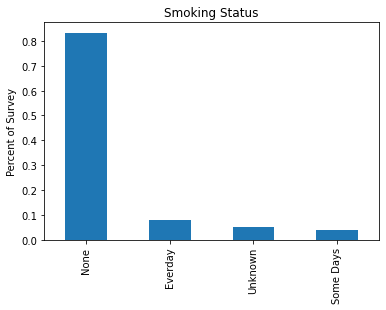

In [30]:
ax = df['Smoker'].value_counts(normalize=True).plot(kind = 'bar')
ax.set_ylabel('Percent of Survey')
ax.set_title('Smoking Status')

In [31]:
# code to graph those proportion of differen smoking groups using matplotlib


In [32]:
# your code here
df.groupby('Smoker')['_STATE'].value_counts()[3:6]

Smoker  _STATE
None    36.0      9983
        34.0      9799
        9.0       9008
Name: _STATE, dtype: int64

<BarContainer object of 3 artists>

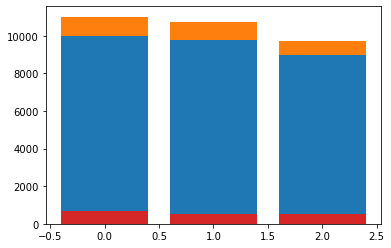

In [33]:
r=[0,1,2]

names=('Conn','NJ','NY')
bar1=df.groupby('Smoker')['_STATE'].value_counts()[3:6]
bar2=df.groupby('Smoker')['_STATE'].value_counts()[0:3]
bar3=df.groupby('Smoker')['_STATE'].value_counts()[6:9]
bar4=df.groupby('Smoker')['_STATE'].value_counts()[9:12]

plt.bar(r,bar1)
plt.bar(r,bar2,bottom=bar1)
plt.bar(r,bar3)
plt.bar(r,bar4)

In [34]:
#graph showing the breakdown of smokers per state

Text(0.5, 1.0, 'Days Sick by Smoking Status')

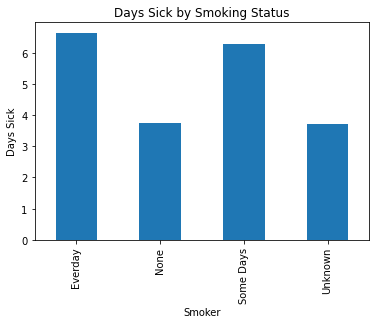

In [35]:
# code to graph these averages sick days for each category of smoking status
ax = df.groupby('Smoker')['PHYSHLTH'].mean().plot(kind='bar')
ax.set_ylabel('Days Sick')
ax.set_title('Days Sick by Smoking Status')

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [36]:
# code here to clean up the ALCDAY5 responses
conditions =[((df['ALCDAY5'] >100) & (df['ALCDAY5'] < 108)),
            ((df['ALCDAY5'] >200) & (df['ALCDAY5'] < 231)),
            df['ALCDAY5'] == 888]

choices = [(df['ALCDAY5']-100)*4,
          df['ALCDAY5']-200,
          0]

df['Drinker']=np.select(conditions,choices,default=np.NaN)
df['Drinker'].value_counts()

0.0     13043
1.0      3027
4.0      2740
2.0      2324
8.0      1601
3.0      1350
30.0     1164
5.0      1156
20.0     1002
12.0      926
10.0      840
28.0      766
15.0      590
16.0      401
6.0       389
7.0       278
25.0      265
24.0      123
14.0       53
29.0       31
9.0        28
27.0       24
18.0       19
26.0       15
22.0       13
21.0       13
13.0       11
11.0       10
17.0        7
23.0        2
19.0        1
Name: Drinker, dtype: int64

In [37]:
df.dropna(subset=['Drinker'],inplace=True)
df['Drinker'].describe()

count    32212.000000
mean         5.295697
std          8.175906
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: Drinker, dtype: float64

Text(0.5, 0, 'Days Drinking')

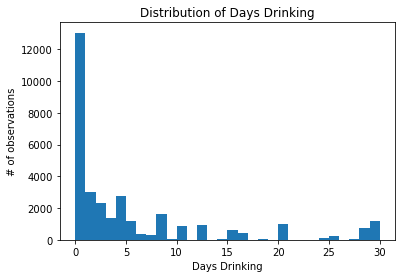

In [38]:
#descriptive statistics of cleaned data
ax = df['Drinker'].plot(kind = 'hist', bins = 30)
ax.set_title('Distribution of Days Drinking')
ax.set_ylabel('# of observations')
ax.set_xlabel('Days Drinking')

In [39]:
# graphic showing the histogram of data


In [40]:
# code to calculate averages per state

df.groupby('_STATE')['Drinker'].mean()

_STATE
9.0     6.004043
34.0    4.887713
36.0    5.073933
Name: Drinker, dtype: float64

In [41]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
df['PHYSHLTH'].corr(df['Drinker'])

-0.09044343519081433

In [42]:
df.loc[:,['PHYSHLTH','Drinker']].corr()

,PHYSHLTH,Drinker
PHYSHLTH,1.000000,-0.090443
Drinker,-0.090443,1.000000


## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [43]:
df['PHYSHLTH'].mean()

4.106463275402765

In [44]:
n=len(df['PHYSHLTH'])
x = df['PHYSHLTH'].mean()
s = df['PHYSHLTH'].std()

stats.t.interval(alpha= .95,
                df = n-1,
                loc = x,
                scale = s/n**.5)

(4.013354594853562, 4.199571955951969)

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [45]:
n=len(df['chron'])
x = df['chron'].mean()
s = df['chron'].std()

stats.t.interval(alpha= .95,
                df = n-1,
                loc = x,
                scale = s/n**.5)

(0.12029983907972452, 0.1274960133976131)

___

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [ ]:
#1
# Null: U=4
#Alternative : U != 4
#two sided t-test

In [50]:
stats.t.ppf(.025,len(df['PHYSHLTH']-1))

-1.9600392211487396

In [52]:
# Let's continue to assume our alpha is 0.05
x_bar = df['PHYSHLTH'].mean()
mu = 4
sample_std = df['PHYSHLTH'].std()
n = len(df['PHYSHLTH'])

t_stat = (x_bar - mu)/(sample_std/np.sqrt(n))
t_stat

2.2173843358771115

In [53]:
stats.ttest_1samp(df['PHYSHLTH'], mu)

Ttest_1sampResult(statistic=2.2173843358773504, pvalue=0.02660394179097971)

In [ ]:
 #2.2173843358773504 > 1.9600392211487396 . We are 95% confident that our population mean is not 4

In [60]:
#2
#Null : mean sick days of men = mean sick days of women
#Alternative: mean sick days of men != mean sick days of women
# two sample t test

In [56]:
df[df['SEX'] == 1]['PHYSHLTH'].mean()

3.742104116750163

In [57]:
df[df['SEX'] == 2]['PHYSHLTH'].mean()

4.387780408071244

In [59]:
stats.ttest_ind(df[df['SEX'] == 1]['PHYSHLTH'],df[df['SEX'] == 2]['PHYSHLTH'], equal_var=False)

Ttest_indResult(statistic=-6.71836859368067, pvalue=1.8702234405566116e-11)

In [ ]:
 #-6.71836859368067 < -1.9600392211487396 critical T value.
# Therefore we can reject the null hypothesis.
#We are 95% confident that the population mean of men sick days are not equal population mean sick days of women

In [ ]:
#3
#Null : mean sick days is equal in NY,NJ, and Conn
#Alternative: Mean sick days are different in any of the states

In [ ]:
f = stats.f_oneway(df['PHYSHLTH'][df['_STATE'] == 9],
                df['PHYSHLTH'][df['_STATE'] == 34], 
                df['PHYSHLTH'][df['_STATE'] == 36])

### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.

In [63]:
stats.norm.ppf(.025)

-1.9599639845400545